# **Projet P6 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. La variable d'intérêt sera la notation IMDB des films. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

1. [Import des librairies](#import_lib)<br>
2. [Import des données](#import_data)<br>
3. [Nettoyage des donnéees](#data_cleaning)<br>
4. [Analyse exploratoire](#exploration)<br>
5. [Pré-traitement](#preprocess)<br>
6. [Une régression linéaire](#reglin)<br>
7. [D'autres modèles de régression](#autres_reg)<br>
8. [De la régression à la classification](#reg_to_class)<br>
9. [Une régression logistique](#reglog)<br>
10. [D'autres modèles de classification](#autre_class)<br>
11. [En option](#option)<br>
    11.1 [Un outil de recommandation](#reco)<br>
    11.2 [Sauvegarder un modèle](#save)<br>
    11.3 [Analyse en composantes principales](#acp)<br>

<a id='import_lib'></a>

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.api import OLS, add_constant

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler

from xgboost import XGBRegressor, XGBClassifier

%matplotlib inline

<a id='import_data'></a>

## **2. Import des données**

In [71]:
data = pd.read_csv('5000_movies_bis.csv')
# pour afficher toutes les colonnes on peut gérer les options d'affichage de pandas
pd.set_option('display.max_columns', 100)
data.head(7)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [72]:
print(f"{data.shape = }")
print(f"{data.director_name.unique().shape = }")
print(f"{max(data.title_year)-min(data.title_year) = }")
print(f"{data.country.nunique(dropna=True) = }")
print(f"{data.language.nunique(dropna=True) = }")

actors = pd.Series(data[['actor_1_name','actor_2_name','actor_3_name']].values.flatten())
print(f"{actors.nunique(dropna=True) = }")

data.shape = (5043, 28)
data.director_name.unique().shape = (2399,)
max(data.title_year)-min(data.title_year) = 100.0
data.country.nunique(dropna=True) = 65
data.language.nunique(dropna=True) = 46
actors.nunique(dropna=True) = 6255


<a id='data_cleaning'></a>

## **3. Nettoyage des données**

**À FAIRE**

>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros


#### **Les doublons**

In [73]:
sum(data.duplicated())

45

In [74]:
data.drop_duplicates(inplace=True)
data.shape

(4998, 28)

In [75]:
# Visualisation des doublons
data = data.sort_values(by=['movie_title','num_voted_users'], ascending=[True,False])

data[data.groupby('movie_imdb_link')['movie_imdb_link'].transform('size') > 1]#.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22124,800,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
3711,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,617.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22123,799,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4352,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,Johnny Depp,A Nightmare on Elm Street,149293,42918,Amanda Wyss,1.0,freddy krueger|lucid dream|serial killer|slash...,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
1420,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,Johnny Depp,A Nightmare on Elm Street,149285,42918,Amanda Wyss,1.0,freddy krueger|lucid dream|serial killer|slash...,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,Jim Sturgess,Across the Universe,91863,5405,Robert Clohessy,0.0,anti war|liverpool|love|protest|song,http://www.imdb.com/title/tt0445922/?ref_=fn_t...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,Color,Catherine Hardwicke,350.0,122.0,308.0,10000.0,Taylor Lautner,17000.0,191449475.0,Drama|Fantasy|Romance,Kristen Stewart,Twilight,348007,44060,Anna Kendrick,1.0,blood|high school|love|school|vampire,http://www.imdb.com/title/tt1099212/?ref_=fn_t...,1535.0,English,USA,PG-13,37000000.0,2008.0,12000.0,5.2,2.35,19000
3981,Color,Jaume Collet-Serra,349.0,113.0,174.0,767.0,Frank Langella,14000.0,61094903.0,Action|Mystery|Thriller,Liam Neeson,Unknown,210548,17151,Aidan Quinn,3.0,agriculture|airport|amnesia|nurse|scientist,http://www.imdb.com/title/tt1401152/?ref_=fn_t...,332.0,English,UK,PG-13,30000000.0,2011.0,902.0,6.9,2.35,29000
1232,Color,Jaume Collet-Serra,349.0,113.0,174.0,767.0,Frank Langella,14000.0,61094903.0,Action|Mystery|Thriller,Liam Neeson,Unknown,210542,17152,Aidan Quinn,3.0,agriculture|airport|amnesia|nurse|scientist,http://www.imdb.com/title/tt1401152/?ref_=fn_t...,332.0,English,UK,PG-13,30000000.0,2011.0,903.0,6.9,2.35,29000
2099,Color,Paul McGuigan,159.0,110.0,118.0,287.0,Spencer Wilding,11000.0,5773519.0,Drama|Horror|Sci-Fi|Thriller,Daniel Radcliffe,Victor Frankenstein,28621,12876,Daniel Mays,2.0,assistant|experiment|frankenstein|medical stud...,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,91.0,English,USA,PG-13,40000000.0,2015.0,1000.0,6.0,2.35,11000


In [76]:
# Suppression des doublons
data.drop_duplicates(subset=['director_name', 'movie_title', 'title_year'], keep="first", inplace=True)
len(data)

4919

In [77]:
# Suppression des doublons
data.drop_duplicates(subset=['movie_imdb_link'], keep="first", inplace=True)
len(data)

4919

#### **Suppression de variables**

In [78]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

La variable `plot_keywords` pourrait être utile mais sera compliquée à gérer.  
La variable `movie_imdb_link` n'a plus d'intérêt pour nous ici. 
On peut donc d'ores et déjà se séparer de ces 2 variables.

In [79]:
data.drop(['plot_keywords', 'movie_imdb_link'], axis=1, inplace=True)
data.shape

(4919, 26)

#### **Les valeurs manquantes et les zéros**

In [80]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

In [82]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='inferno', ax=ax[0])
ax[0].set_title('Les NaNs')
sns.heatmap(data==0, yticklabels=False, cbar=False, cmap='plasma', ax=ax[1])
ax[1].set_title('Les zéros');

In [83]:
data.isnull().sum().sort_values(ascending=False)/len(data)

gross                     0.135800
budget                    0.081114
aspect_ratio              0.066274
content_rating            0.061191
title_year                0.021549
director_name             0.020736
director_fb_likes         0.020736
num_critic_for_reviews    0.009961
actor_3_fb_likes          0.004676
actor_3_name              0.004676
num_user_for_reviews      0.004269
color                     0.003863
duration                  0.003049
language                  0.002846
actor_2_fb_likes          0.002643
facenumber_in_poster      0.002643
actor_2_name              0.002643
actor_1_fb_likes          0.001423
actor_1_name              0.001423
country                   0.001016
imdb_score                0.000000
cast_total_fb_likes       0.000000
num_voted_users           0.000000
movie_title               0.000000
genres                    0.000000
movie_fb_likes            0.000000
dtype: float64

**Gestion des zéros**

La plupart des zéros sont des valeurs manquantes vraisemblablement, à l'exception de ceux de la variable `facenumber_in_poster`. On les remplace par des NaN.

In [84]:
#sélection des variables contenant des 0 sauf facenumber_in_poster
cols = data.columns[(data==0).any()].drop('facenumber_in_poster')

#remplacement des 0 par des nan
data[cols] = data[cols].replace(0, np.nan)

In [85]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='inferno', ax=ax[0])
ax[0].set_title('Les NaNs')
sns.heatmap(data==0, yticklabels=False, cbar=False, cmap='inferno', ax=ax[1])
ax[1].set_title('Les zéros')

Text(0.5, 1.0, 'Les zéros')

**Gestion des NaN**

In [86]:
data.isnull().sum().sort_values(ascending=False)/len(data)

movie_fb_likes            0.433218
director_fb_likes         0.199431
gross                     0.135800
budget                    0.081114
aspect_ratio              0.066274
content_rating            0.061191
actor_3_fb_likes          0.022769
title_year                0.021549
director_name             0.020736
actor_2_fb_likes          0.013824
num_critic_for_reviews    0.009961
cast_total_fb_likes       0.006709
actor_1_fb_likes          0.006709
actor_3_name              0.004676
num_user_for_reviews      0.004269
color                     0.003863
duration                  0.003049
language                  0.002846
facenumber_in_poster      0.002643
actor_2_name              0.002643
actor_1_name              0.001423
country                   0.001016
num_voted_users           0.000000
movie_title               0.000000
genres                    0.000000
imdb_score                0.000000
dtype: float64

`movie_fb_likes` et `director_fb_likes` ont trop de valeurs manquantes et supprimer les lignes diminuerait de manière trop importante la taille de notre dataset. On ne conserve donc pas ces variables.

In [87]:
# suppression 
data.drop(['movie_fb_likes', 'director_fb_likes'], axis=1, inplace=True)
data.shape

(4919, 24)

**Dans le dataset initial (5000_movies.csv)**, il y a beaucoup de valeurs manquantes dans `gross` et dans `budget` donc imputation délicate mais comme on veut garder ces variables, on va alors supprimer les lignes. Avant cette suppression on peut essayer de scraper IMDB pour obtenir des informations supplémentaires. Pour cela, un petit notebook séparé dans le même dossier permet de récupérer les données supplémentaires éventuelles, de les ajouter dans les colonnes `gross` et `budget` du dataframe `data`. Comme l'éxecution est un peu longue, on va sauvegarder ce dataframe dans un nouveau csv pour ne pas avoir à le refaire à chaque fois.

In [88]:
data.dropna(subset=['gross', 'budget'], inplace=True)
data.shape

(4066, 24)

In [89]:
print(f"Pourcentage d'observations écartées : {round((4919-4066)/4919*100,1)}%")

Pourcentage d'observations écartées : 17.3%


In [90]:
print(f"Nombre d'observations encore incomplètes: {4213-data.dropna().shape[0]}")

Nombre d'observations encore incomplètes: 348


In [91]:
data.isnull().sum().sort_values(ascending=False)/len(data)

aspect_ratio              0.025824
content_rating            0.017462
actor_3_fb_likes          0.015494
actor_2_fb_likes          0.008608
actor_1_fb_likes          0.003935
cast_total_fb_likes       0.003935
actor_3_name              0.002951
facenumber_in_poster      0.002213
actor_2_name              0.001476
num_critic_for_reviews    0.001476
language                  0.001476
actor_1_name              0.000984
duration                  0.000492
num_user_for_reviews      0.000492
color                     0.000492
director_name             0.000000
gross                     0.000000
num_voted_users           0.000000
country                   0.000000
movie_title               0.000000
budget                    0.000000
title_year                0.000000
genres                    0.000000
imdb_score                0.000000
dtype: float64

`aspect_ratio` est la prochaine variable avec le plus de NaN. Une rapide recherche et on trouve que c'est le rapport de la largeur sur la hauteur de l'image. Probablement un intérêt limité dans notre cas mais on vérifie avant de décider si on la conserve.

In [92]:
data.aspect_ratio.value_counts()

aspect_ratio
2.35     2052
1.85     1689
1.37       61
1.66       48
1.78       46
1.33       23
2.39       13
2.20       11
2.40        3
2.00        3
2.76        3
1.75        2
16.00       2
1.77        1
1.50        1
1.18        1
2.24        1
2.55        1
Name: count, dtype: int64

In [93]:
# Principalement 2.35 et 1.85, on regroupe les autres valeurs sous une seule modalité et on va calculer la moyenne et la variance du score de chaque sous-groupe
print(
    'Les moyennes des 3 groupes sont :',
    data.imdb_score[data.aspect_ratio==2.35].mean(),
    data.imdb_score[data.aspect_ratio==1.85].mean(),
    data.imdb_score[(data.aspect_ratio!=2.35)&(data.aspect_ratio!=1.85)].mean()
)

print(
    'Les variances des 3 groupes sont :',
    data.imdb_score[data.aspect_ratio==2.35].std()**2,
    data.imdb_score[data.aspect_ratio==1.85].std()**2,
    data.imdb_score[(data.aspect_ratio!=2.35)&(data.aspect_ratio!=1.85)].std()**2
)

Les moyennes des 3 groupes sont : 6.506968810916179 6.378389579632919 6.64123076923077
Les variances des 3 groupes sont : 0.9784740838634316 1.2747519073795033 1.3382330484330482


In [94]:
# Étant données les moyennes et variances très proches des 3 groupes, on peut supprimer cette variable de notre analyse sans que cela affecte les résultats.
data.drop('aspect_ratio', axis=1, inplace=True)
data.shape

(4066, 23)

`content_rating` est la 4ème variable avec le plus de NaN. On souhaite conserver cette variable en revanche on pourra difficilement faire de l'imputation de valeurs qui a du sens donc on choisit de supprimer les lignes.

In [95]:
data.dropna(subset=['content_rating'], inplace=True)
data.shape

(3995, 23)

In [96]:
data.isnull().sum().sort_values(ascending=False)

actor_3_fb_likes          43
actor_2_fb_likes          19
facenumber_in_poster       9
actor_3_name               7
language                   5
cast_total_fb_likes        5
num_critic_for_reviews     5
actor_1_fb_likes           5
num_user_for_reviews       2
color                      2
actor_2_name               2
actor_1_name               1
duration                   1
budget                     0
content_rating             0
country                    0
title_year                 0
num_voted_users            0
director_name              0
movie_title                0
genres                     0
gross                      0
imdb_score                 0
dtype: int64

On peut regarder certaines variables "à la main" car on pourra trouver les informations facilement.

In [97]:
# facenumber_in_poster
data[data.facenumber_in_poster.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score
1948,NaN,Lasse Hallström,162.0,108.0,690.0,Henry Thomas,17000.0,80014842.0,Drama|Romance|War,Channing Tatum,Dear John,104356,19945.0,Scott Porter,NaN,186.0,English,USA,PG-13,25000000.0,2010.0,861.0,6.3
4444,Color,Frank Lotito,NaN,102.0,259.0,Jake Busey,3000.0,35312.0,Comedy|Drama|Family,Brighton Sharbino,Growing Up Smith,108,4320.0,Tim Guinee,NaN,1.0,English,USA,PG-13,2000000.0,2015.0,660.0,8.2
3016,Color,Randall Wallace,82.0,99.0,79.0,Connor Corum,399.0,91443253.0,Biography|Drama,Jacob Vargas,Heaven Is for Real,21034,663.0,Rob Moran,NaN,153.0,English,USA,PG,12000000.0,2014.0,116.0,5.8
3373,Color,Justin Tipping,6.0,80.0,102.0,Natalie Stephany Aguilar,861.0,150191.0,Adventure,Tina Gilton,Kicks,59,1279.0,Justin Hall,NaN,6.0,English,USA,R,2000000.0,2016.0,163.0,7.8
3853,Color,Andrew Erwin,49.0,98.0,402.0,Sarah Drew,589.0,10429707.0,Comedy,Alex Kendrick,Moms' Night Out,10483,2705.0,Patricia Heaton,NaN,125.0,English,USA,PG,5000000.0,2014.0,416.0,5.4
248,Color,Dave Green,181.0,112.0,799.0,Noel Fisher,5000.0,81638674.0,Action|Adventure|Comedy|Sci-Fi,Stephen Amell,Teenage Mutant Ninja Turtles: Out of the Shadows,17533,8306.0,Brad Garrett,NaN,115.0,English,USA,PG-13,135000000.0,2016.0,833.0,6.3
99,Color,Peter Jackson,645.0,182.0,773.0,Adam Brown,5000.0,303001229.0,Adventure|Fantasy,Aidan Turner,The Hobbit: An Unexpected Journey,637246,9152.0,James Nesbitt,NaN,1367.0,English,USA,PG-13,180000000.0,2012.0,972.0,7.9
4692,Color,Caryn Waechter,23.0,104.0,195.0,Kara Hayward,601.0,6870.0,Drama|Mystery|Thriller,Laura Fraser,The Sisterhood of Night,1354,1581.0,Louis Ozawa Changchien,NaN,17.0,English,USA,PG-13,1000000.0,2014.0,524.0,6.3
3797,Color,M. Night Shyamalan,371.0,94.0,99.0,Patch Darragh,432.0,65069140.0,Horror|Thriller,Ocean James,The Visit,65299,1010.0,Olivia DeJonge,NaN,455.0,English,USA,PG-13,5000000.0,2015.0,309.0,6.2


In [98]:
# il y en a que 9, exceptionnellement on peut aller voir les affiches des films ça va aller vite
data.loc[99,'facenumber_in_poster'] = 1 #hobbit
data.loc[248,'facenumber_in_poster'] = 8 #tortues ninja
data.loc[1948,'facenumber_in_poster'] = 2 #dear john
data.loc[3016,'facenumber_in_poster'] = 2 #heaven
data.loc[3373,'facenumber_in_poster'] = 0 #kicks
data.loc[3797,'facenumber_in_poster'] = 0 #the visit
data.loc[3853,'facenumber_in_poster'] = 6 #mom's night out
data.loc[4444,'facenumber_in_poster'] = 4 #Growing Up Smith
data.loc[4692,'facenumber_in_poster'] = 4 #The Sisterhood of Night

In [99]:
# color
data[data.color.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score
1948,NaN,Lasse Hallström,162.0,108.0,690.0,Henry Thomas,17000.0,80014842.0,Drama|Romance|War,Channing Tatum,Dear John,104356,19945.0,Scott Porter,2.0,186.0,English,USA,PG-13,25000000.0,2010.0,861.0,6.3
3638,NaN,Wayne Wang,56.0,104.0,451.0,Russell Wong,974.0,1346503.0,Drama|History,Bingbing Li,Snow Flower and the Secret Fan,3024,2430.0,Ji-hyun Jun,0.0,22.0,English,China,PG-13,6000000.0,2011.0,595.0,6.1


In [100]:
# les 2 valeurs manquantes correspondent à des films récents et en couleur
data.loc[data.color.isna(), 'color'] = 'Color'

In [101]:
# language
data[data.language.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score
4110,Color,Michael Landon Jr.,5.0,87.0,331.0,Kevin Gage,702.0,252726.0,Drama|Family|Western,William Morgan Sheppard,Love's Abiding Joy,1289,2715.0,Brianna Brown,0.0,18.0,NaN,USA,PG,3000000.0,2006.0,366.0,7.2
2895,Color,Jean-Jacques Annaud,62.0,100.0,91.0,Everett McGill,581.0,20959585.0,Adventure|Drama|History,Rae Dawn Chong,Quest for Fire,16281,931.0,Gary Schwartz,0.0,96.0,NaN,Canada,R,12500000.0,1981.0,201.0,7.4
3931,Color,Ron Fricke,115.0,102.0,NaN,Balinese Tari Legong Dancers,48.0,2601847.0,Documentary|Music,Collin Alfredo St. Dic,Samsara,22457,48.0,Puti Sri Candra Dewi,0.0,69.0,NaN,USA,PG-13,4000000.0,2011.0,NaN,8.5
3086,Color,Christopher Cain,43.0,111.0,258.0,Taylor Handley,482.0,1066555.0,Drama|History|Romance|Western,Jon Gries,September Dawn,2618,1526.0,Trent Ford,0.0,111.0,NaN,USA,R,11000000.0,2007.0,362.0,5.8
3869,Color,Mel Brooks,39.0,87.0,753.0,Dom DeLuise,898.0,36145695.0,Comedy|Romance,Sid Caesar,Silent Movie,12666,2951.0,Bernadette Peters,0.0,61.0,NaN,USA,PG,4400000.0,1976.0,842.0,6.7


In [102]:
# les 3 valeurs manquantes correspondent à des films américains
data.loc[data.language.isna(), 'language'] = 'English'

In [103]:
#title_year
data[data.title_year.isna()]

,color,director_name,num_critic_for_reviews,duration,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score


On regarde un peu plus en détails les histoires de likes facebook. Notamment la correlation entre ces variables.

In [104]:
sns.heatmap(data[['cast_total_fb_likes', 'actor_1_fb_likes', 'actor_2_fb_likes', 'actor_3_fb_likes', 'imdb_score']].corr(), annot=True)

<AxesSubplot:title={'center':'Les zéros'}>

`cast_total_fb_likes` et `actor_1_fb_likes` sont très corrélées. Pour les 2 autres variables `actor_2_fb_likes` et `actor_3_fb_likes` on peut choisir de les supprimer pour les remplacer par une information `other_actors_fb_likes` = `cast_total_fb_likes` - `actor_1_fb_likes`, cela permettra de diminuer le nombre de valeurs manquantes.

In [105]:
# calcul de other_actors_fb_likes
data['other_actors_fb_likes'] = data.cast_total_fb_likes - data.actor_1_fb_likes

In [106]:
# suppression variables redondantes
data.drop(['cast_total_fb_likes', 'actor_2_fb_likes', 'actor_3_fb_likes'], axis=1, inplace=True)
data.shape

(3995, 21)

In [107]:
data.isnull().sum().sort_values(ascending=False)

actor_3_name              7
other_actors_fb_likes     5
num_critic_for_reviews    5
actor_1_fb_likes          5
actor_2_name              2
num_user_for_reviews      2
duration                  1
actor_1_name              1
language                  0
imdb_score                0
title_year                0
budget                    0
content_rating            0
country                   0
color                     0
facenumber_in_poster      0
director_name             0
movie_title               0
genres                    0
gross                     0
num_voted_users           0
dtype: int64

Finalement, pour les 5 lignes ayant des valeurs manquantes restantes pour les likes facebook on peut imputer la médiane.  
Idem pour num_critic_for_reviews, num_user_for_reviews et duration.

In [108]:
#imputation de la médiane pour quelques valeurs manquantes
data.loc[data.other_actors_fb_likes.isna(),'other_actors_fb_likes'] = data.other_actors_fb_likes.median()
data.loc[data.actor_1_fb_likes.isna(),'actor_1_fb_likes'] = data.actor_1_fb_likes.median()
data.loc[data.num_critic_for_reviews.isna(),'num_critic_for_reviews'] = data.num_critic_for_reviews.median()
data.loc[data.num_user_for_reviews.isna(),'num_user_for_reviews'] = data.num_user_for_reviews.median()
data.loc[data.duration.isna(),'duration'] = data.duration.median()

In [109]:
data.isnull().sum().sort_values(ascending=False)

actor_3_name              7
actor_2_name              2
actor_1_name              1
color                     0
facenumber_in_poster      0
imdb_score                0
title_year                0
budget                    0
content_rating            0
country                   0
language                  0
num_user_for_reviews      0
num_voted_users           0
director_name             0
movie_title               0
genres                    0
gross                     0
actor_1_fb_likes          0
duration                  0
num_critic_for_reviews    0
other_actors_fb_likes     0
dtype: int64

Quant aux noms d'acteurs/réalisateurs, comme on ne les gardera pas pour la partie modélisation mais uniquement pour la visualisation (on reviendra dessus le moment venu), on peut les conserver tels quels pour le moment.

In [110]:
# on reset l'index après toutes les suppressions de lignes
data.reset_index(drop=True, inplace=True)

#### **Modification de variables**

In [111]:
data.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,other_actors_fb_likes
0,Color,Dan Trachtenberg,411.0,104.0,John Gallagher Jr.,14000.0,71897215.0,Drama|Horror|Mystery|Sci-Fi|Thriller,Bradley Cooper,10 Cloverfield Lane,126893,Sumalee Montano,0.0,440.0,English,USA,PG-13,15000000.0,2016.0,7.3,504.0
1,Color,Timothy Hines,1.0,111.0,Kelly LeBrock,1000.0,14616.0,Drama,Christopher Lambert,10 Days in a Madhouse,314,Alexandra Callas,1.0,10.0,English,USA,R,12000000.0,2015.0,7.5,1059.0
2,Color,Gil Junger,133.0,97.0,Heath Ledger,23000.0,38176108.0,Comedy|Drama|Romance,Joseph Gordon-Levitt,10 Things I Hate About You,222099,Andrew Keegan,6.0,549.0,English,USA,PG-13,16000000.0,1999.0,7.2,14907.0
3,Color,Kevin Lima,84.0,100.0,Eric Idle,2000.0,66941559.0,Adventure|Comedy|Family,Ioan Gruffudd,102 Dalmatians,26413,Jim Carter,1.0,77.0,English,USA,G,85000000.0,2000.0,4.8,2182.0
4,Color,Robert Moresco,26.0,107.0,Brad Renfro,954.0,53481.0,Crime|Drama|Thriller,Brian Dennehy,10th & Wolf,5557,Dash Mihok,5.0,34.0,English,USA,R,8000000.0,2006.0,6.4,1558.0


In [112]:
# affichage des valeurs pour voir s'il n'y a pas de caractères spéciaux qui se baladent.
data.loc[0].values

array(['Color', 'Dan Trachtenberg', 411.0, 104.0, 'John Gallagher Jr.',
       14000.0, 71897215.0, 'Drama|Horror|Mystery|Sci-Fi|Thriller',
       'Bradley Cooper', '10 Cloverfield Lane\xa0', 126893,
       'Sumalee Montano', 0.0, 440.0, 'English', 'USA', 'PG-13',
       15000000.0, 2016.0, 7.3, 504.0], dtype=object)

In [113]:
# c'est pas évident à voir mais il y a bien un \xa0 louche après les titres des films qu'on vire du coup
data.movie_title = data.movie_title.apply(lambda row : row.replace('\xa0',''))

On va regarder plus en détail la variable `content_rating`.

In [114]:
data.content_rating.value_counts()

content_rating
R            1827
PG-13        1324
PG            612
G             100
Not Rated      57
Unrated        30
Approved       19
X              11
NC-17           7
Passed          3
M               3
GP              2
Name: count, dtype: int64

Une petite recherche et on trouve que historiquement, on a plus ou moins :
- Passed = Approved = M = GP = PG
- TV-14 = PG-13
- X = NC-17
- Not Rated = Unrated = NR

On veut donc remplacer :
- Passed, Approved, M et GP par **PG**
- TV-14 par **PG-13**
- X par **NC-17**
- Not Rated et Unrated par **UR** qui sont les notations utilisées aujourd'hui.

In [115]:
def replace_rating(row):
    if row['content_rating'] in ['Passed', 'Approved', 'M', 'GP']:
        return 'PG'
    elif row['content_rating'] in ['Not Rated', 'Unrated']:
        return 'UR'
    elif row['content_rating'] == 'X':
        return 'NC-17'
    elif row['content_rating'] == 'TV-14':
        return 'PG-13'
    else:
        return row['content_rating']
    
data['content_rating'] = data.apply(replace_rating, axis=1)
data.content_rating.value_counts()

content_rating
R        1827
PG-13    1324
PG        639
G         100
UR         87
NC-17      18
Name: count, dtype: int64

On a déjà géré presque tout, le dernier point en suspens est la variable `genre` qu'il faut spliter puis créer des OneHotEncoded variables.

In [116]:
genre_dummies = data.genres.str.get_dummies('|')
data = pd.concat([data,genre_dummies], axis=1)
data.drop(['genres'], axis=1, inplace=True)
data

,color,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_fb_likes,gross,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,Dan Trachtenberg,411.0,104.0,John Gallagher Jr.,14000.0,71897215.0,Bradley Cooper,10 Cloverfield Lane,126893,Sumalee Montano,0.0,440.0,English,USA,PG-13,15000000.0,2016.0,7.3,504.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
1,Color,Timothy Hines,1.0,111.0,Kelly LeBrock,1000.0,14616.0,Christopher Lambert,10 Days in a Madhouse,314,Alexandra Callas,1.0,10.0,English,USA,R,12000000.0,2015.0,7.5,1059.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Gil Junger,133.0,97.0,Heath Ledger,23000.0,38176108.0,Joseph Gordon-Levitt,10 Things I Hate About You,222099,Andrew Keegan,6.0,549.0,English,USA,PG-13,16000000.0,1999.0,7.2,14907.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Color,Kevin Lima,84.0,100.0,Eric Idle,2000.0,66941559.0,Ioan Gruffudd,102 Dalmatians,26413,Jim Carter,1.0,77.0,English,USA,G,85000000.0,2000.0,4.8,2182.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Color,Robert Moresco,26.0,107.0,Brad Renfro,954.0,53481.0,Brian Dennehy,10th & Wolf,5557,Dash Mihok,5.0,34.0,English,USA,R,8000000.0,2006.0,6.4,1558.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,Color,Jaume Balagueró,222.0,85.0,Pablo Rosso,37.0,27024.0,Jonathan D. Mellor,[Rec] 2,55597,Andrea Ros,0.0,148.0,Spanish,Spain,R,5600000.0,2009.0,6.6,36.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3991,Color,David Cronenberg,196.0,115.0,Sarah Polley,1000.0,2840417.0,Jennifer Jason Leigh,eXistenZ,77493,Callum Rennie,0.0,527.0,English,Canada,R,31000000.0,1999.0,6.8,1990.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3992,Color,Lee Tamahori,77.0,101.0,Nona Gaye,287.0,26082914.0,Sunny Mabrey,xXx: State of the Union,51349,Xzibit,2.0,213.0,English,USA,PG-13,87000000.0,2005.0,4.3,706.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3993,Color,Rob Cohen,191.0,132.0,Eve,14000.0,141204016.0,Vin Diesel,xXx,142569,Leila Arcieri,0.0,737.0,English,USA,PG-13,70000000.0,2002.0,5.8,790.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [117]:
data.language.value_counts()

language
English       3819
French          38
Spanish         26
Mandarin        14
Japanese        11
German          11
Italian          8
Cantonese        7
Hindi            7
Korean           6
Portuguese       6
Persian          4
Russian          4
Norwegian        4
Thai             3
Danish           3
Dutch            3
Dari             2
Hebrew           2
Indonesian       2
Aboriginal       2
Arabic           2
Hungarian        1
Aramaic          1
Filipino         1
Kazakh           1
Romanian         1
Mongolian        1
Maya             1
Vietnamese       1
Bosnian          1
Czech            1
Zulu             1
Name: count, dtype: int64

In [118]:
def replace_language(row):
    if row['language'] in ['French', 'Spanish', 'German', 'Italian', 'Portuguese', 'Norwegian', 'Dutch',
                           'Danish', 'Romanian', 'Bosnian', 'Czech', 'Hungarian', 'Swedish']:
        return 'European'
    elif row['language'] == 'English':
        return 'English'
    else:
        return 'Other languages'
    
data['language'] = data.apply(replace_language, axis=1)
data.language.value_counts()

language
English            3819
European            103
Other languages      73
Name: count, dtype: int64

In [119]:
data.country.value_counts()

country
USA               3144
UK                 342
France             111
Germany             78
Canada              77
Australia           41
Spain               24
Japan               16
Italy               13
Hong Kong           13
China               13
South Korea         10
Mexico              10
Denmark              9
New Zealand          9
Ireland              8
India                7
Brazil               6
Norway               6
Russia               5
South Africa         5
Argentina            4
Netherlands          4
Iran                 4
Thailand             4
Czech Republic       3
Hungary              2
West Germany         2
Romania              2
Taiwan               2
Israel               2
Poland               1
Egypt                1
Soviet Union         1
Indonesia            1
Iceland              1
Belgium              1
Chile                1
Peru                 1
Official site        1
Afghanistan          1
Greece               1
Colombia             1
Fin

In [120]:
def replace_country(row):
    if row['country'] in ['UK', 'France', 'Spain', 'Germany', 'West Germany', 'Italy', 'Portugal', 'Norway', 'Netherlands',
                        'Denmark', 'Ireland', 'Romania', 'Iceland', 'Czech', 'Hungary', 'Sweden', 'Belgium', 'Greece',
                        'Bulgaria', 'Switzerland', 'Poland', 'Finland']:
        return 'Europe'
    elif row['country'] in ['USA', 'Canada']:
        return 'North America'
    else:
        return 'Other countries'
    
data['country'] = data.apply(replace_country, axis=1)
data.country.value_counts()

country
North America      3221
Europe              607
Other countries     167
Name: count, dtype: int64

## **4. Analyse exploratoire**

<a id='exploration'></a>

Dans cette partie, vous devez "explorer" vos données. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".


In [121]:
data.describe()

,num_critic_for_reviews,duration,actor_1_fb_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
count,3995.000000,3995.000000,3995.000000,3.995000e+03,3.995000e+03,3995.000000,3995.000000,3.995000e+03,3995.000000,3995.000000,3995.000000,3995.000000,3995.00000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000
mean,158.155695,109.647059,7364.735419,4.851440e+07,9.859936e+04,1.373217,313.905382,4.296707e+07,2002.502128,6.460426,3529.898748,0.243304,0.20000,0.050814,0.064831,0.389487,0.184981,0.015519,0.507885,0.114894,0.129662,0.000250,0.040801,0.102628,0.043805,0.025782,0.100125,0.000501,0.226033,0.129412,0.039299,0.284105,0.041552,0.017772
std,121.433931,22.522166,15319.074452,6.749046e+07,1.482819e+05,2.038472,396.094758,2.191938e+08,10.675023,1.065900,6414.003886,0.429131,0.40005,0.219644,0.246258,0.487695,0.388331,0.123622,0.500000,0.318933,0.335973,0.015821,0.197854,0.303511,0.204686,0.158505,0.300204,0.022372,0.418313,0.335697,0.194330,0.451044,0.199588,0.132139
min,1.000000,37.000000,2.000000,1.620000e+02,2.200000e+01,0.000000,1.000000,2.180000e+02,1927.000000,1.600000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,95.000000,713.000000,6.054808e+06,1.583000e+04,0.000000,97.000000,8.500000e+06,1999.000000,5.900000,837.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,129.000000,105.000000,1000.000000,2.586392e+07,4.757400e+04,1.000000,194.000000,2.200000e+07,2004.000000,6.600000,1775.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,214.000000,119.000000,12000.000000,6.231996e+07,1.156685e+05,2.000000,375.000000,5.000000e+07,2010.000000,7.200000,3047.500000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,813.000000,330.000000,640000.000000,7.605058e+08,1.689764e+06,43.000000,5060.000000,1.221550e+10,2016.000000,9.300000,139717.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


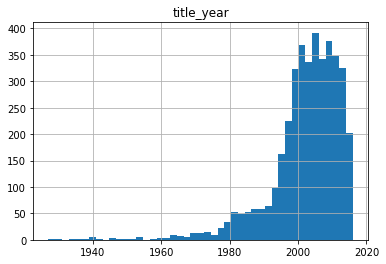

In [125]:
#historique des sorties de films
data.hist('title_year', bins=45)
plt.show()

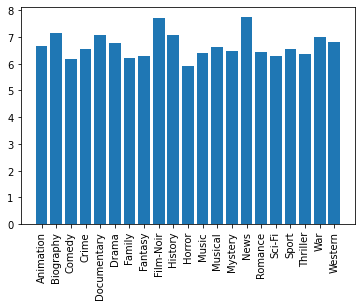

In [126]:
#Les moyennes par genre
mean_genre = {}
for gen in data.columns[-21:]:
    mean_genre[gen] = data.loc[data[gen]==1,'imdb_score'].mean()
    
plt.bar(mean_genre.keys(), mean_genre.values())
plt.xticks(rotation=90)
plt.show()

On peut regarder un peu le profit généré par les films pour cela on crée la variable `profit` = `gross` - `budget`

In [127]:
#Top 20 des films ayant généré le plus de profit
data['profit'] = data.gross - data.budget
top20profit = data[['movie_title', 'profit', 'budget']].sort_values('profit', ascending=False).iloc[:20].reset_index(drop=True)
top20profit

,movie_title,profit,budget
0,Avatar,523505847.0,237000000.0
1,Jurassic World,502177271.0,150000000.0
2,Titanic,458672302.0,200000000.0
3,Star Wars: Episode IV - A New Hope,449935665.0,11000000.0
4,E.T. the Extra-Terrestrial,424449459.0,10500000.0
5,The Avengers,403279547.0,220000000.0
6,The Lion King,377783777.0,45000000.0
7,Star Wars: Episode I - The Phantom Menace,359544677.0,115000000.0
8,The Dark Knight,348316061.0,185000000.0
9,The Hunger Games,329999255.0,78000000.0


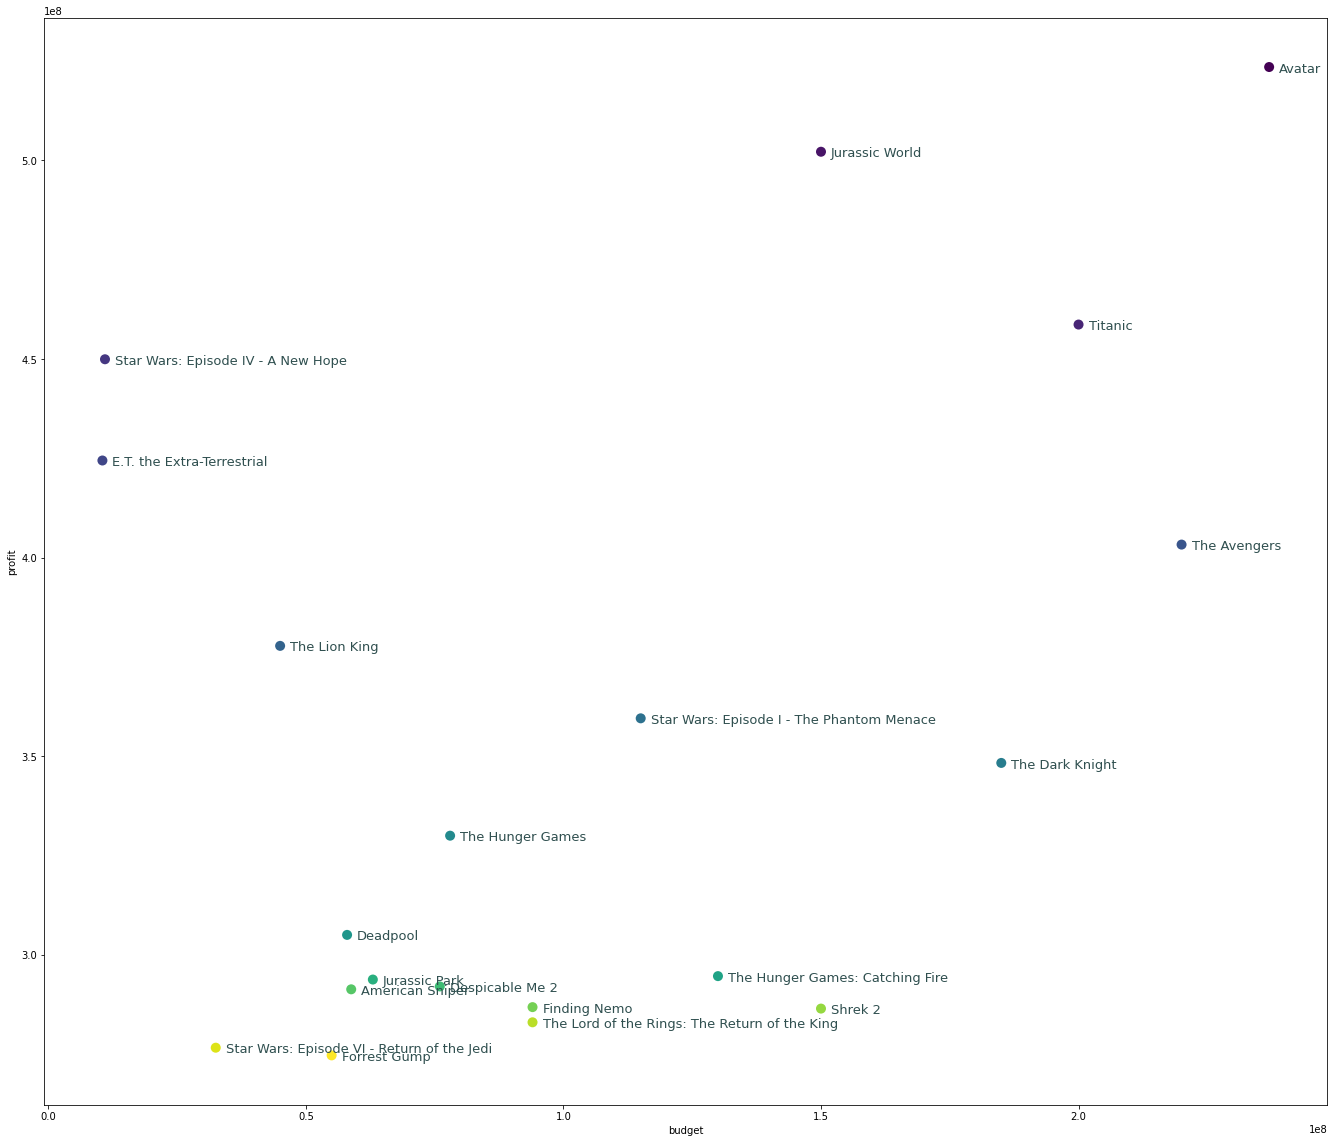

In [129]:
fig, ax = plt.subplots(1,1,figsize=(23,20))
top20profit.plot('budget', 'profit', kind='scatter', ax=ax, s=100, linewidth=0, c=range(20), colorbar=False)

for k in range(20):
    ax.annotate(top20profit.loc[k,'movie_title'], top20profit.loc[k,['budget','profit']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

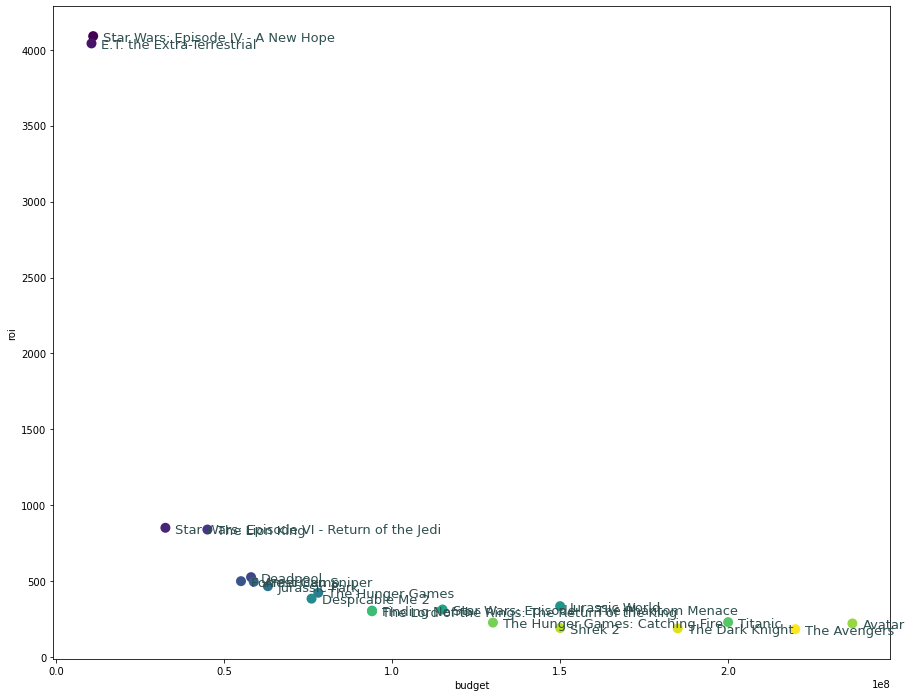

In [130]:
#Retour sur investissement du top20 des profits
top20profit['roi'] = top20profit.profit/top20profit.budget*100
top20profit = top20profit.sort_values('roi', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(1,1,figsize=(15,12))
top20profit.plot('budget', 'roi', kind='scatter', ax=ax, s=100, linewidth=0, c=range(20), colorbar=False);
for k in range(20):
    ax.annotate(top20profit.loc[k,'movie_title'], top20profit.loc[k,['budget','roi']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

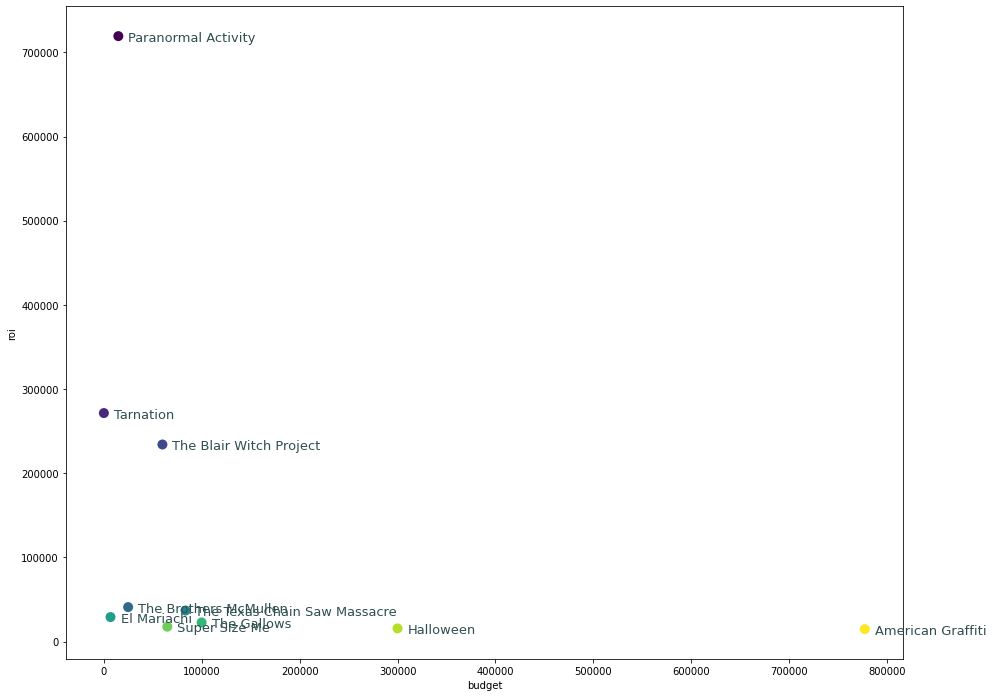

In [132]:
#Top 10 des films ayant les meilleurs retour sur investissement
data['roi'] = data.profit/data.budget*100
top10roi = data[['movie_title', 'roi', 'budget']].sort_values('roi', ascending=False).iloc[:10].reset_index(drop=True)

fig, ax = plt.subplots(1,1,figsize=(15,12))
top10roi.plot('budget', 'roi', kind='scatter', ax=ax, s=100, linewidth=0, c=range(10), colorbar=False)
for k in range(10):
    ax.annotate(top10roi.loc[k,'movie_title'], top10roi.loc[k,['budget','roi']],
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=13, color='darkslategrey')

In [133]:
#Top 20 des réalisateurs ayant les meilleurs notes IMDB et leur nombre de films dans la base
directors = data[['director_name', 'imdb_score', 'movie_title']].groupby('director_name').agg({'imdb_score':'mean', 'movie_title':'count'})
top20real = directors.sort_values('imdb_score', ascending=False).iloc[:20]
top20real

,imdb_score,movie_title
director_name,,
Akira Kurosawa,8.700,1
Michael Curtiz,8.600,1
Tony Kaye,8.600,1
Charles Chaplin,8.600,1
Damien Chazelle,8.500,1
Ron Fricke,8.500,1
Alfred Hitchcock,8.500,1
Majid Majidi,8.500,1
Sergio Leone,8.475,4


<a id='preprocess'></a>

## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre jeu de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

**Suppression de variables**

Pour commencer on peut s'interroger sur l'intérêt de conserver les noms des acteurs/réalisateurs dans les variables car il y en a énormément (2399 réalisateurs et 6256 acteurs différents). Cette très forte variabilité limite l'impact de ces variables on va donc supprimer ces variables.

On peut aussi déjà virer la variable `profit` qu'on a créé pour la partie visualisation.

In [134]:
data.drop(['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'profit', 'roi'], axis=1, inplace=True)
data.shape

(3995, 38)

**Variables catégoriques**

In [135]:
data.select_dtypes(include="object")

,color,language,country,content_rating
0,Color,English,North America,PG-13
1,Color,English,North America,R
2,Color,English,North America,PG-13
3,Color,English,North America,G
4,Color,English,North America,R
...,...,...,...,...
3990,Color,European,Europe,R
3991,Color,English,North America,R
3992,Color,English,North America,PG-13
3993,Color,English,North America,PG-13


In [136]:
# On va maintenant créer les dummy variables
for varcat in data.select_dtypes(include="object").columns :
    dum = pd.get_dummies(data[varcat], drop_first=True)
    data = pd.concat([data,dum], axis=1)
    data.drop([varcat], axis=1, inplace=True)
data

,num_critic_for_reviews,duration,actor_1_fb_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Color,European,Other languages,North America,Other countries,NC-17,PG,PG-13,R,UR
0,411.0,104.0,14000.0,71897215.0,126893,0.0,440.0,15000000.0,2016.0,7.3,504.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,True,False,False,True,False,False,False,True,False,False
1,1.0,111.0,1000.0,14616.0,314,1.0,10.0,12000000.0,2015.0,7.5,1059.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,True,False,False,False,False,True,False
2,133.0,97.0,23000.0,38176108.0,222099,6.0,549.0,16000000.0,1999.0,7.2,14907.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,True,False,False,True,False,False,False,True,False,False
3,84.0,100.0,2000.0,66941559.0,26413,1.0,77.0,85000000.0,2000.0,4.8,2182.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,True,False,False,False,False,False,False
4,26.0,107.0,954.0,53481.0,5557,5.0,34.0,8000000.0,2006.0,6.4,1558.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,222.0,85.0,37.0,27024.0,55597,0.0,148.0,5600000.0,2009.0,6.6,36.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,True,True,False,False,False,False,False,False,True,False
3991,196.0,115.0,1000.0,2840417.0,77493,0.0,527.0,31000000.0,1999.0,6.8,1990.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,True,False,False,True,False,False,False,False,True,False
3992,77.0,101.0,287.0,26082914.0,51349,2.0,213.0,87000000.0,2005.0,4.3,706.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True,False,False,True,False,False,False,True,False,False
3993,191.0,132.0,14000.0,141204016.0,142569,0.0,737.0,70000000.0,2002.0,5.8,790.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True,False,False,True,False,False,False,True,False,False


**Variables numériques**

In [137]:
data.describe()

,num_critic_for_reviews,duration,actor_1_fb_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
count,3995.000000,3995.000000,3995.000000,3.995000e+03,3.995000e+03,3995.000000,3995.000000,3.995000e+03,3995.000000,3995.000000,3995.000000,3995.000000,3995.00000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000
mean,158.155695,109.647059,7364.735419,4.851440e+07,9.859936e+04,1.373217,313.905382,4.296707e+07,2002.502128,6.460426,3529.898748,0.243304,0.20000,0.050814,0.064831,0.389487,0.184981,0.015519,0.507885,0.114894,0.129662,0.000250,0.040801,0.102628,0.043805,0.025782,0.100125,0.000501,0.226033,0.129412,0.039299,0.284105,0.041552,0.017772
std,121.433931,22.522166,15319.074452,6.749046e+07,1.482819e+05,2.038472,396.094758,2.191938e+08,10.675023,1.065900,6414.003886,0.429131,0.40005,0.219644,0.246258,0.487695,0.388331,0.123622,0.500000,0.318933,0.335973,0.015821,0.197854,0.303511,0.204686,0.158505,0.300204,0.022372,0.418313,0.335697,0.194330,0.451044,0.199588,0.132139
min,1.000000,37.000000,2.000000,1.620000e+02,2.200000e+01,0.000000,1.000000,2.180000e+02,1927.000000,1.600000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,95.000000,713.000000,6.054808e+06,1.583000e+04,0.000000,97.000000,8.500000e+06,1999.000000,5.900000,837.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,129.000000,105.000000,1000.000000,2.586392e+07,4.757400e+04,1.000000,194.000000,2.200000e+07,2004.000000,6.600000,1775.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,214.000000,119.000000,12000.000000,6.231996e+07,1.156685e+05,2.000000,375.000000,5.000000e+07,2010.000000,7.200000,3047.500000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,813.000000,330.000000,640000.000000,7.605058e+08,1.689764e+06,43.000000,5060.000000,1.221550e+10,2016.000000,9.300000,139717.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comme on va utiliser vraisemblablement différents modèles dont certains nécéssitent un *feature scaling*, on va le faire dès maintenant (enfin une fois qu'on aura découpé nos données en échantillons *train* et *test* puisque, pour rappel, les données *test* doivent être transformées de la même manière que les données *train*)

**Création des échantillons pour la modélisation**

In [138]:
# matrice X et vecteur y
X = data.drop('imdb_score', axis=1)
y = data['imdb_score']

X.head()

,num_critic_for_reviews,duration,actor_1_fb_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Color,European,Other languages,North America,Other countries,NC-17,PG,PG-13,R,UR
0,411.0,104.0,14000.0,71897215.0,126893,0.0,440.0,15000000.0,2016.0,504.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,True,False,False,True,False,False,False,True,False,False
1,1.0,111.0,1000.0,14616.0,314,1.0,10.0,12000000.0,2015.0,1059.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,True,False,False,False,False,True,False
2,133.0,97.0,23000.0,38176108.0,222099,6.0,549.0,16000000.0,1999.0,14907.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,True,False,False,True,False,False,False,True,False,False
3,84.0,100.0,2000.0,66941559.0,26413,1.0,77.0,85000000.0,2000.0,2182.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,True,False,False,False,False,False,False
4,26.0,107.0,954.0,53481.0,5557,5.0,34.0,8000000.0,2006.0,1558.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True,False,False,True,False,False,False,False,True,False


<a id='reglin'></a>

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

In [139]:
# échantillons train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3196, 43) (799, 43) (3196,) (799,)


In [193]:
#feature scaling
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns, index = X_test.index)

In [141]:
# pour pouvoir obtenir simplement les coefficients et les p-values, on passe par OLS de statsmodel
X_train_const = add_constant(X_train) # pour ajouter une constante à notre modèle sinon il n'y en a pas par défaut

# on fit la régression linéaire sur les données d'entrainement et on affiche direct le summary
OLS(y_train, X_train_const).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     77.48
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:52:25   Log-Likelihood:                -3609.3
No. Observations:                3196   AIC:                             7305.
Df Residuals:                    3153   BIC:                             7566.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.4757      0.170     43.994      0.000       7.142       7.809
num_critic_for_reviews     2.2516      0.141     15.959      0.000       1.975       2.528
duration                   1.3539      0.221      6.122      0.000       0.920       1.787
actor_1_fb_likes           1.2760      0.572      2.232      0.026       0.155       2.397
gross                     -0.0647      0.233     -0.278      0.781      -0.521       0.392
num_voted_users            4.5496      0.266     17.073      0.000       4.027       5.072
facenumber_in_poster      -0.6922      0.305     -2.267      0.023      -1.291      -0.093
num_user_for_reviews      -1.8610      0.300     -6.197      0.000      -2.450      -1.272
budget                    -0.7415      0.696     -1.066      0.287      -2.106       0.623
title_year                -2.3237      0.144    -16.164      0.000      -2.606      -2.042
other_actors_fb_likes     -0.6105      0.195     -3.137      0.002      -0.992      -0.229
Action                    -0.2040      0.039     -5.211      0.000      -0.281      -0.127
Adventure                 -0.0636      0.043     -1.491      0.136      -0.147       0.020
Animation                  0.7101      0.078      9.073      0.000       0.557       0.864
Biography                  0.2098      0.062      3.375      0.001       0.088       0.332
Comedy                    -0.1031      0.037     -2.825      0.005      -0.175      -0.032
Crime                      0.0390      0.040      0.966      0.334      -0.040       0.118
Documentary                1.0970      0.121      9.036      0.000       0.859       1.335
Drama                      0.4374      0.035     12.403      0.000       0.368       0.507
Family                    -0.1104      0.071     -1.565      0.118      -0.249       0.028
Fantasy                   -0.0904      0.044     -2.032      0.042      -0.178      -0.003
Film-Noir              -4.588e-16   8.69e-16     -0.528      0.597   -2.16e-15    1.24e-15
History                   -0.0638      0.079     -0.808      0.419      -0.219       0.091
Horror                    -0.3779      0.053     -7.068      0.000      -0.483      -0.273
Music                     -0.1073      0.068     -1.586      0.113      -0.240       0.025
Musical                   -0.0360      0.088     -0.408      0.684      -0.209       0.137
Mystery                    0.0660      0.048      1.369      0.171      -0.029       0.161
News                       0.0102      0.549      0.019      0.985      -1.066       1.086
Romance                   -0.0134      0.035     -0.383      0.702      -0.082       0.055
Sci-Fi                    -0.1713      0.045     -3.836      0.000      -0.259      -0.084
Sport                      0.1279      0.076      1.693      0.090      -0.020  

In [142]:
# MAE
mean_absolute_error(OLS(y_train,X_train_const).fit().predict(X_train_const),y_train)

0.5517838794607298

In [143]:
# MAE sur X_test
X_test_const = add_constant(X_test)
mean_absolute_error(OLS(y_train,X_train_const).fit().predict(X_test_const),y_test)

0.5454121843520651

In [144]:
# On peut aussi utiliser RFE pour sélection les variables : disons qu'on veut en garder en 25
rfe = RFE(estimator=LinearRegression(), n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [145]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['num_critic_for_reviews', 'duration', 'actor_1_fb_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'num_user_for_reviews',
       'budget', 'title_year', 'other_actors_fb_likes', 'Action', 'Animation',
       'Biography', 'Documentary', 'Drama', 'Horror', 'Sport', 'Color',
       'European', 'Other languages', 'NC-17', 'PG', 'PG-13', 'R', 'UR'],
      dtype='object')

In [146]:
#colonnes supprimées
X_train.columns[~rfe.support_]

Index(['Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'North America', 'Other countries'],
      dtype='object')

In [147]:
#On crée un jeu de données RFE avec uniquement les variables sélectionnées via RFE
X_train_rfe = X_train[col_rfe]
X_test_rfe = X_test[col_rfe]

In [148]:
OLS(y_train, add_constant(X_train_rfe)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     125.7
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:52:25   Log-Likelihood:                -3641.6
No. Observations:                3196   AIC:                             7335.
Df Residuals:                    3170   BIC:                             7493.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.1092      0.158     44.854      0.000       6.798       7.420
num_critic_for_reviews     2.2666      0.139     16.277      0.000       1.994       2.540
duration                   1.5076      0.211      7.137      0.000       1.093       1.922
actor_1_fb_likes           1.3274      0.575      2.310      0.021       0.201       2.454
gross                     -0.3337      0.228     -1.463      0.143      -0.781       0.113
num_voted_users            4.6323      0.266     17.406      0.000       4.111       5.154
facenumber_in_poster      -0.7146      0.302     -2.366      0.018      -1.307      -0.122
num_user_for_reviews      -1.9211      0.299     -6.434      0.000      -2.507      -1.336
budget                    -0.9538      0.698     -1.367      0.172      -2.322       0.414
title_year                -2.3534      0.139    -16.942      0.000      -2.626      -2.081
other_actors_fb_likes     -0.6606      0.196     -3.377      0.001      -1.044      -0.277
Action                    -0.2374      0.034     -6.940      0.000      -0.304      -0.170
Animation                  0.6248      0.073      8.544      0.000       0.481       0.768
Biography                  0.2608      0.059      4.412      0.000       0.145       0.377
Documentary                1.1786      0.117     10.104      0.000       0.950       1.407
Drama                      0.4881      0.033     14.856      0.000       0.424       0.552
Horror                    -0.3775      0.050     -7.624      0.000      -0.475      -0.280
Sport                      0.1625      0.075      2.177      0.030       0.016       0.309
Color                     -0.2312      0.076     -3.029      0.002      -0.381      -0.082
European                   0.7280      0.091      7.985      0.000       0.549       0.907
Other languages            0.6925      0.105      6.610      0.000       0.487       0.898
NC-17                      0.2681      0.220      1.220      0.222      -0.163       0.699
PG                         0.2608      0.095      2.757      0.006       0.075       0.446
PG-13                      0.2446      0.098      2.488      0.013       0.052       0.437
R                          0.5039      0.097      5.189      0.000       0.313       0.694
UR                         0.6084      0.131      4.651      0.000       0.352       0.865
==============================================================================
Omnibus:                      731.069   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2317.260
Skew:                          -1.150   Prob(JB):                         0.00
Kurtosis:                       6.480   Cond. No.                         97.0
=================================================

In [149]:
# MAE sur X_train_rfe
print('mae train', mean_absolute_error(OLS(y_train,add_constant(X_train_rfe)).fit().predict(add_constant(X_train_rfe)),y_train))
print('mae test', mean_absolute_error(OLS(y_train,add_constant(X_train_rfe)).fit().predict(add_constant(X_test_rfe)),y_test))

mae train 0.5610218024860261
mae test 0.546680364487244


Comme on pouvait s'y attendre, la régression linéaire n'est vraiment pas terrible puisque le modèle n'est pas linéaire...on peut essayer une regression régularisée mais même s'il semble y avoir un léger sur-apprentissage, l'intérêt est limité. Pour les avoir testées, les régressions Ridge et Lasso ne donnent pas non plus de bons résultats.

<a id='autres_reg'></a>

## **7. D'autres modèles de régression**

#### **SVM avec différents kernels**

In [150]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lin = SVR(kernel='linear', gamma='auto')
svr_poly = SVR(kernel='poly', gamma='auto', degree=2)

In [151]:
svr_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svr_rbf.predict(X_test)

In [152]:
y_pred_svm_rbf.min(), y_pred_svm_rbf.max()

(4.973301152631409, 10.14935763868537)

In [153]:
mean_absolute_error(y_pred_svm_rbf, y_test)

0.5293055079141531

In [154]:
svr_lin.fit(X_train, y_train)
y_pred_svm_lin = svr_lin.predict(X_test)

In [155]:
y_pred_svm_lin.min(), y_pred_svm_lin.max()

(4.767630445768811, 11.130283376362186)

In [156]:
mean_absolute_error(y_pred_svm_lin, y_test)

0.5383219076154753

In [157]:
svr_poly.fit(X_train_rfe, y_train)
y_pred_svm_poly = svr_poly.predict(X_test_rfe)

In [158]:
y_pred_svm_poly.min(), y_pred_svm_poly.max()

(5.583102875817057, 9.105452799594907)

In [159]:
mean_absolute_error(y_pred_svm_poly, y_test)

0.6359576879914073

#### **Gradient Boosting**

https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502

In [160]:
gradientboost = GradientBoostingRegressor(loss='absolute_error',learning_rate=0.03,n_estimators=200,max_depth=4)
gradientboost.fit(X_train_rfe,y_train)

GradientBoostingRegressor(learning_rate=0.03, loss='absolute_error',
                          max_depth=4, n_estimators=200)

In [161]:
y_pred_gb = gradientboost.predict(X_test_rfe)
error = gradientboost.loss_(y_test,y_pred_gb) # la fonction de perte est Mean square error
print("MAE:%.3f" % error)

MAE:0.470


In [162]:
mean_absolute_error(y_pred_gb, y_test)

0.46996505964640667

In [163]:
y_pred_gb.min(), y_pred_gb.max()

(5.184899459030217, 8.70921039636872)

In [164]:
# recherche des hyperparametres avec GridSearchCV
param_grid = {
    'loss' : ['absolute_error'],
    'max_depth' : [6,7,8],
    'learning_rate' : [0.01],
    'n_estimators': [500, 1000, 1500]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search_gb.fit(X_train, y_train)
grid_search_gb.best_params_

{'learning_rate': 0.01,
 'loss': 'absolute_error',
 'max_depth': 7,
 'n_estimators': 1500}

In [165]:
grid_search_gb_pred = grid_search_gb.predict(X_test)
mean_absolute_error(y_test.values, grid_search_gb_pred)

0.45274384573910936

#### **Forêts aléatoires**

In [166]:
rfr = RandomForestRegressor(n_estimators = 500)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [167]:
mean_absolute_error(rfr_pred, y_test)

0.45830963704630856

In [168]:
param_grid = {
    'max_depth': [10, 50, 100, 150],
    'n_estimators': [100, 500, 1000, 1500]
}

grid_search_rfr = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_rfr.fit(X_train, y_train)
grid_search_rfr.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'max_depth': 100, 'n_estimators': 500}

In [169]:
y_grid_pred_rfr = grid_search_rfr.predict(X_test)
mean_absolute_error(y_grid_pred_rfr, y_test.values)

0.4558007509386739

#### **XGBoost**

In [170]:
xgb = XGBRegressor(n_estimators = 500)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [171]:
mean_absolute_error(xgb.predict(X_test), y_test.values)

0.46933845429307086

In [172]:
xgb.score(X_train, y_train)

0.999996472186966

In [173]:
r2_score(y_test, xgb.predict(X_test))

0.6257513790351128

In [174]:
param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate' : [0.001, 0.01, 0.1],
    'n_estimators' : [500, 1000, 1500]
}

grid_search_xgb = GridSearchCV(XGBRegressor(), param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1500}

In [175]:
y_pred_xgb = grid_search_xgb.predict(X_test)
mean_absolute_error(y_test.values, y_pred_xgb)

0.4443299417650894

In [194]:
from joblib import dump

dump(grid_search_xgb, 'model/xgb_model.joblib')
dump(scaler, 'model/min_max_scaler.joblib')

['model/min_max_scaler.joblib']

<a id='irr'></a>

In [199]:
print(X_test)

      num_critic_for_reviews  duration  actor_1_fb_likes         gross  \
1597                0.049096  0.163823          0.053839  7.968385e-07   
1870                0.052972  0.242321          0.003608  1.104473e-02   
1782                0.038760  0.262799          0.003769  8.628828e-02   
2135                0.370801  0.269625          0.088455  1.489327e-02   
3559                0.204134  0.218430          0.000904  1.055278e-02   
...                      ...       ...               ...           ...   
1227                0.134367  0.235495          0.061531  5.454502e-02   
653                 0.217054  0.197952          0.002385  1.575178e-01   
2192                0.086563  0.300341          0.069224  1.016745e-01   
697                 0.082687  0.269625          0.069224  7.747227e-02   
1802                0.074935  0.215017          0.003838  2.513831e-02   

      num_voted_users  facenumber_in_poster  num_user_for_reviews    budget  \
1597         0.002351           

In [205]:
X_test_json = X_test.head().to_json()
X_test_json

'{"num_critic_for_reviews":{"1597":0.0490956072,"1870":0.0529715762,"1782":0.0387596899,"2135":0.3708010336,"3559":0.2041343669},"duration":{"1597":0.1638225256,"1870":0.2423208191,"1782":0.2627986348,"2135":0.2696245734,"3559":0.2184300341},"actor_1_fb_likes":{"1597":0.0538388757,"1870":0.0036077201,"1782":0.0037692598,"2135":0.0884545266,"3559":0.0009038531},"gross":{"1597":0.0000007968,"1870":0.0110447299,"1782":0.08628828,"2135":0.0148932705,"3559":0.0105527834},"num_voted_users":{"1597":0.0023512618,"1870":0.0030797802,"1782":0.0043326423,"2135":0.0492019144,"3559":0.0113633472},"facenumber_in_poster":{"1597":0.0,"1870":0.1627906977,"1782":0.1162790698,"2135":0.0,"3559":0.0697674419},"num_user_for_reviews":{"1597":0.0021743428,"1870":0.0175924096,"1782":0.0096857086,"2135":0.0454635303,"3559":0.0508005535},"budget":{"1597":0.0016372463,"1870":0.0013097935,"1782":0.0016372463,"2135":0.0018009727,"3559":0.0003847392},"title_year":{"1597":0.9662921348,"1870":0.5842696629,"1782":0.955

In [203]:
grid_search_xgb.predict(X_test.iloc[:2])

array([5.5492125, 5.0275292], dtype=float32)

In [206]:
new_X_test = pd.read_json(X_test_json)
new_X_test

C:\Users\luca5\AppData\Local\Temp\ipykernel_3280\3911070209.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_X_test = pd.read_json(X_test_json)


,num_critic_for_reviews,duration,actor_1_fb_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,other_actors_fb_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Color,European,Other languages,North America,Other countries,NC-17,PG,PG-13,R,UR
1597,0.049096,0.163823,0.053839,7.968000e-07,0.002351,0.000000,0.002174,0.001637,0.966292,0.110853,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1870,0.052972,0.242321,0.003608,1.104473e-02,0.003080,0.162791,0.017592,0.001310,0.584270,0.007193,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1782,0.038760,0.262799,0.003769,8.628828e-02,0.004333,0.116279,0.009686,0.001637,0.955056,0.012676,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2135,0.370801,0.269625,0.088455,1.489327e-02,0.049202,0.000000,0.045464,0.001801,0.966292,0.008116,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3559,0.204134,0.218430,0.000904,1.055278e-02,0.011363,0.069767,0.050801,0.000385,0.662921,0.000465,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


#### **Interprétation des résultats**

On va conserver le modèle XG Boost qui obtient le plus faible MAE.

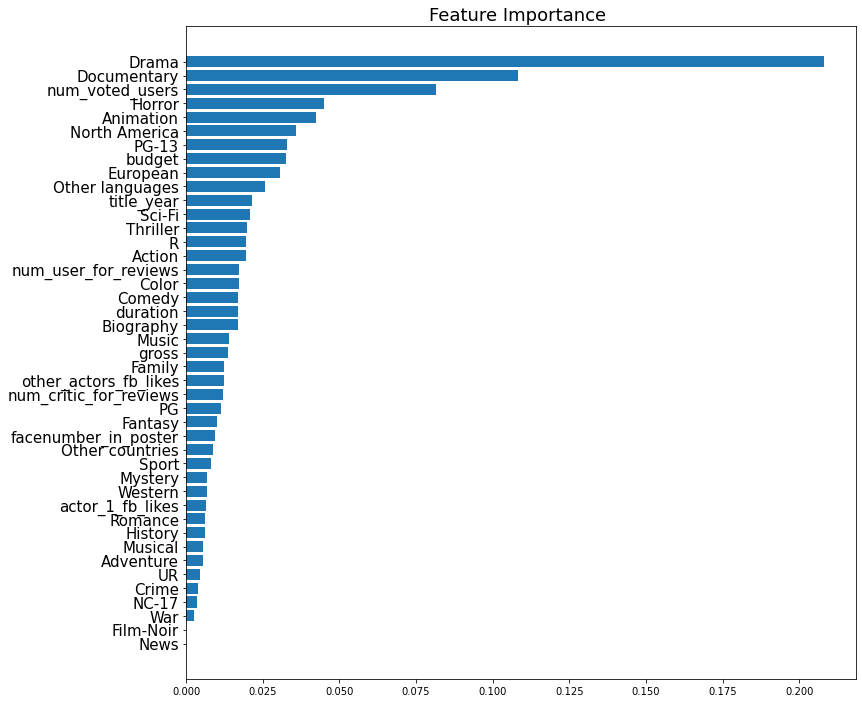

In [176]:
feature_importance = grid_search_xgb.best_estimator_.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X_train.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

<a id='reg_to_class'></a>

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

In [177]:
y_class = pd.qcut(y, 5, labels=['nul','bof','sympa','bon','super']) # par quantile !
# y_class = pd.cut(y, [0,4,6,7,8,10], labels=[0,1,2,3,4])
y_class.value_counts()

imdb_score
nul      884
sympa    831
super    780
bof      776
bon      724
Name: count, dtype: int64

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.2, random_state=64)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3196, 43), (799, 43), (3196,), (799,))

In [179]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns, index = X_test.index)

<a id='reglog'></a>

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

In [180]:
reglog = LogisticRegression(solver='lbfgs', max_iter=500)
reglog.fit(X_train,y_train)
print(reglog.score(X_train,y_train), reglog.score(X_test,y_test))

0.5109511889862328 0.4856070087609512


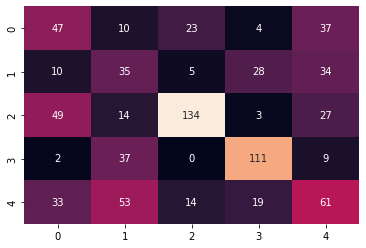

In [181]:
sns.heatmap(confusion_matrix(reglog.predict(X_test),y_test), annot=True, fmt='d', cbar=False);

In [182]:
# On peut aussi utiliser RFE pour sélection les variables : disons qu'on veut en garder en 25
rfe = RFE(estimator=LogisticRegression(solver='lbfgs', max_iter=500), n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)
col_rfe = X_train.columns[rfe.support_]

In [183]:
#colonnes supprimées
X_train.columns[~rfe.support_]

Index(['facenumber_in_poster', 'Adventure', 'Crime', 'Family', 'Film-Noir',
       'History', 'Music', 'Musical', 'Mystery', 'News', 'Sport', 'War',
       'Western', 'Other countries', 'NC-17', 'PG', 'R', 'UR'],
      dtype='object')

In [184]:
#On crée un jeu de données RFE avec uniquement les variables sélectionnées via RFE
X_train_rfe = X_train[col_rfe]
X_test_rfe = X_test[col_rfe]

In [185]:
reglog = LogisticRegression(solver='lbfgs', max_iter=500)
reglog.fit(X_train_rfe,y_train)
print(reglog.score(X_train_rfe,y_train), reglog.score(X_test_rfe,y_test))

0.4953066332916145 0.4780976220275344


<a id='autre_class'></a>

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

#### **SVM avec avec un kernel gaussien**

In [186]:
svc_rbf = SVC(kernel='rbf', C=100, gamma= 'scale', decision_function_shape='ovo', random_state = 42)

In [187]:
svc_rbf.fit(X_train, y_train)
print(classification_report(y_test, svc_rbf.predict(X_test)))

              precision    recall  f1-score   support

         bof       0.31      0.36      0.33       141
         bon       0.36      0.36      0.36       149
         nul       0.61      0.64      0.62       176
       super       0.68      0.61      0.64       165
       sympa       0.38      0.35      0.36       168

    accuracy                           0.47       799
   macro avg       0.47      0.46      0.46       799
weighted avg       0.48      0.47      0.47       799



#### **Forêts aléatoires pour la classification**

In [188]:
param_grid = {
    'max_depth': [50, 100, 150],
    'n_estimators': [100, 500, 1000, 1500],
    'random_state' :[0]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_rfc.fit(X_train, y_train)
print(classification_report(y_test, grid_search_rfc.predict(X_test), zero_division=0))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


              precision    recall  f1-score   support

         bof       0.34      0.30      0.32       141
         bon       0.38      0.32      0.35       149
         nul       0.59      0.73      0.65       176
       super       0.74      0.68      0.71       165
       sympa       0.34      0.36      0.35       168

    accuracy                           0.49       799
   macro avg       0.48      0.48      0.48       799
weighted avg       0.49      0.49      0.49       799



#### **Gradient Boost pour la classification**

In [189]:
param_grid = {
    'max_depth': [10, 50, 90],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500],
    'learning_rate' : [0.1, 0.2],
    'random_state' : [0]
}

grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_gbc.fit(X_train, y_train)
print(classification_report(y_test, grid_search_gbc.predict(X_test)))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
              precision    recall  f1-score   support

         bof       0.35      0.33      0.34       141
         bon       0.39      0.34      0.37       149
         nul       0.59      0.72      0.65       176
       super       0.73      0.67      0.70       165
       sympa       0.36      0.36      0.36       168

    accuracy                           0.50       799
   macro avg       0.48      0.49      0.48       799
weighted avg       0.49      0.50      0.49       799



#### **XG Boost pour la classification**

In [190]:
param_grid = {
     'objective' : ['multi:softmax', 'multi:softprob'],
     'n_estimators': [100, 500, 1000]
}

grid_search_xgbc = GridSearchCV(XGBClassifier(random_state=0, use_label_encoder=False), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_xgbc.fit(X_train, y_train)
print(classification_report(y_test, grid_search_xgbc.predict(X_test)))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\luca5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\luca5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\luca5\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\luca5\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", line 1

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['bof' 'bon' 'nul' 'super' 'sympa']

#### **Interprétation des résultats**

On va conserver le modèle XG Boost qui obtient la meilleure *accuracy* sur l'échantillon test.

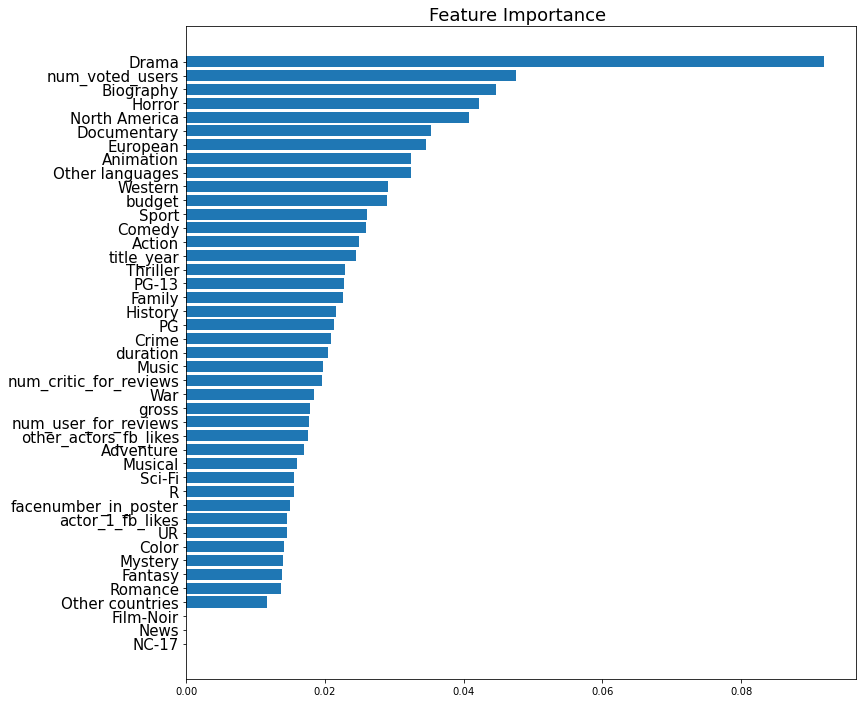

In [ ]:
feature_importance = grid_search_xgbc.best_estimator_.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X_train.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

<a id='option'></a>

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

<a id='reco'></a>

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

<a id='save'></a>

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

<a id='acp'></a>

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  